In [1]:
#Carga librerías importantes
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import operator
import pip
import csv
import pickle
import operator
import random as rd
pip.main(['install','python-louvain'])
import community
from collections import Counter
import itertools

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab as pl
from sklearn import metrics
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words

stopwords = get_stop_words('es')

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
encuestas= csv.reader(open('./datos_propios/syntax.csv'))

# Preparación datos

In [17]:
#Preparación de datos
import json
from pprint import pprint
import ast 
lines = [line.rstrip('\n') for line in open('./datos_propios/syntax.csv')]
print(type(lines))

<class 'list'>


In [73]:
nueva=[]
for i in range(len(lines)):
    if "text {" in lines[i]:
        nueva.append(i) 
lemmas=[]
pos_tags=[]
dep_edges=[]

In [74]:
for i in range(len(nueva)-1):
    entidad = lines[nueva[i]:nueva[i+1]]
    lemma="NA"
    pos_tag= "NA"
    dep_edge="NA"
    lemma=[k for k in entidad if 'lemma' in k]
    pos_tag=[k for k in entidad if 'tag' in k]
    dep_edge=[k for k in entidad if 'head_token_index' in k]
    lemmas.append(lemma)
    pos_tags.append(pos_tag)
    dep_edges.append(dep_edge)
    
    
#lemmas = [k for k in lines if 'lemma' in k]
print(len(lemmas))
#pos_tag= [k for k in lines if 'tag' in k]
print(len(pos_tags))
#dep_edge= [k for k in lines if 'head_token_index' in k]
print(len(dep_edges))
df= pd.DataFrame(
    {'lemma': lemmas,
     'tag': pos_tags,
     'dep': dep_edges
    })
print(df)

35648
35648
35648
                            dep                      lemma             tag
0                            []              [lemma: "QT"]   [  tag: NOUN]
1       [  head_token_index: 2]               [lemma: "@"]  [  tag: PUNCT]
2                            []  [lemma: "mipaisyelmundo"]   [  tag: VERB]
3       [  head_token_index: 2]               [lemma: ":"]  [  tag: PUNCT]
4       [  head_token_index: 6]               [lemma: "A"]    [  tag: ADP]
5       [  head_token_index: 4]            [lemma: "esto"]    [  tag: DET]
6       [  head_token_index: 2]           [lemma: "salar"]   [  tag: VERB]
7       [  head_token_index: 8]              [lemma: "el"]    [  tag: DET]
8       [  head_token_index: 6]      [lemma: "venezolano"]   [  tag: NOUN]
9                            []               [lemma: "?"]  [  tag: PUNCT]
10     [  head_token_index: 10]               [lemma: "a"]    [  tag: ADP]
11     [  head_token_index: 10]         [lemma: "mostrar"]   [  tag: VERB]
12     

In [82]:
df.to_csv('./entidades.csv', sep=',', encoding='utf-8')

In [10]:
print(len(listofDB))
listofDB[4689].info()
#print(listofDB[50]['partOfSpeech'])

8216
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
dependencyEdge    8 non-null object
lemma             8 non-null object
partOfSpeech      8 non-null object
text              8 non-null object
dtypes: object(4)
memory usage: 336.0+ bytes


In [11]:
sentenceslist=p1d['entities'].tolist()
#print((type(tokenslist[1])) )
listofDBsentences=[]
for i in range(len(sentenceslist)):
    #print(i)
    db=pd.DataFrame(sentenceslist[i])
    listofDBsentences.append(db)
#tokensdb.head()
print(len(listofDBsentences))
listofDBsentences[4680]
#print(listofDB[50]['partOfSpeech'])

8216


mentions metadata      name  \
0  [{'text': {'content': 'personal', 'beginOffset...       {}  personal   

   salience    type  
0         1  PERSON

In [26]:
listOfverbosDB=[]
for i in range(len(listofDB)):
    #solop3
    if i!=4688:
        #print(i)
        #verbosDB= listofDB[i][listofDB[i]['partOfSpeech'].apply(str).str.contains('NOUN')]
        verbosDB= listofDB[i][listofDB[i]['partOfSpeech'].apply(str).str.contains('NOUN|VERB|ADV|ADJ')]
        listOfverbosDB.append(verbosDB)

In [19]:
listOfverbosDB[1]['lemma']

Series([], Name: lemma, dtype: object)

In [20]:
verboslemmatizados=[]
for i in range(len(listOfverbosDB)):
    verboslemmatizados.append(listOfverbosDB[i]['lemma'])
    #print((listOfverbosDB[i]['lemma']))

In [21]:
todoslosverbos=[]
for i in range(len(verboslemmatizados)):
    #print(i)
    x=verboslemmatizados[i].tolist()
    todoslosverbos.append(x)

#print((todoslosverbos))

In [22]:
print((todoslosverbos[50]))

['poder', 'mantener']


In [117]:
adjetivos_solo=[line.rstrip('\n') for line in open('./sustantivos')]
print(adjetivos_solo)


['lemma', '[\'lemma: "QT"\']', '[\'lemma: "venezolano"\']', '[\'lemma: "miseria"\']', '[\'lemma: "salvajismo"\']', '[\'lemma: "carta"\']', '[\'lemma: "presentación"\']', '[\'lemma: "joda"\']', '[\'lemma: "malandro"\']', '[\'lemma: "necesidad"\']', '[\'lemma: "limosna"\']', '[\'lemma: "madurismo"\']', '[\'lemma: "Ecuador"\']', '[\'lemma: "Perú"\']', '[\'lemma: "rata"\']', '[\'lemma: "#"\']', '[\'lemma: "Ibarra"\']', '[\'lemma: "jove"\']', '[\'lemma: "año"\']', '[\'lemma: "puñalada"\']', '[\'lemma: "novio"\']', '[\'lemma: "#"\']', '[\'lemma: "mujer"\']', '[\'lemma: "mes"\']', '[\'lemma: "gestación"\']', '[\'lemma: "https://t.co/ZsnQ0a5euR"\']', '[\'lemma: "Colombia"\']', '[\'lemma: "moda"\']', '[\'lemma: "derecho"\']', '[\'lemma: "imponer"\']', '[\'lemma: "ladrón"\']', '[\'lemma: "político"\']', '[\'lemma: "venezolano"\']', '[\'lemma: "víctima"\']', '[\'lemma: "víctima"\']', '[\'lemma: "pedazo"\']', '[\'lemma: "país"\']', '[\'lemma: "realidad"\']', '[\'lemma: "antecedente"\']', '[\'lemma

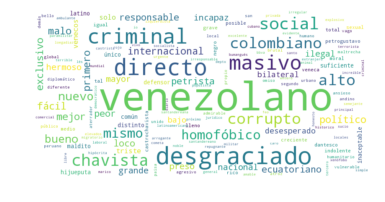

In [116]:
string=''.join(str(r) for v in adjetivos_solo for r in v)
#print(string)
stopwords = get_stop_words('es')
string=string.replace('lemma', '')
string=string.replace('https', '')
string=string.replace('rt', '')
string=string.replace('qt', '')
string=string.replace('ser', '')
string=string.replace('hacer', '')
string=string.replace('haber', '')
string=string.replace('tener', '')
string=string.replace('estar', '')
w= WordCloud(background_color="white", max_words=2000,collocations=False,scale=2).generate(string.lower())
plt.figure()
plt.imshow(w, interpolation="bilinear")
plt.axis("off")
plt.savefig('./sustantivos.png',dpi=2000)
plt.show()



In [118]:
#def red_color_func(word, font_size, position, orientation, random_state=None):
 #   return np.random.choice(["red", "black"])% random.randint(40, 100)
stopwords = get_stop_words('es')
#mask = np.array(Image.open("./2.png"))
string=' '.join(str(r) for v in adjetivos_solo for r in v)
print(string)
#string=string.replace('ser', '')
#string=verbos.lemma.str.cat(sep=' ')
#print(string)

w= WordCloud(background_color="white", max_words=2000,collocations=False,mask=mask,scale=2).generate(string.lower())
#w= WordCloud(background_color= "rgba(255, 255, 255, 0)",mode='RGBA', max_words=20000,collocations=False,scale=4,colormap='Wistia',stopwords=stopwords).generate(string.lower())
#w= WordCloud(background_color="white", max_words=20000,collocations=False,scale=4,stopwords=stopwords).generate(string.lower())
# lower max_font_size
#wordcloud = WordCloud(max_font_size=40).generate(string)
plt.figure()
plt.imshow(w, interpolation="bilinear")
plt.axis("off")
plt.savefig('./p3.png', dpi=5000)
plt.show()


l e m m a [ ' l e m m a :   " Q T " ' ] [ ' l e m m a :   " v e n e z o l a n o " ' ] [ ' l e m m a :   " m i s e r i a " ' ] [ ' l e m m a :   " s a l v a j i s m o " ' ] [ ' l e m m a :   " c a r t a " ' ] [ ' l e m m a :   " p r e s e n t a c i ó n " ' ] [ ' l e m m a :   " j o d a " ' ] [ ' l e m m a :   " m a l a n d r o " ' ] [ ' l e m m a :   " n e c e s i d a d " ' ] [ ' l e m m a :   " l i m o s n a " ' ] [ ' l e m m a :   " m a d u r i s m o " ' ] [ ' l e m m a :   " E c u a d o r " ' ] [ ' l e m m a :   " P e r ú " ' ] [ ' l e m m a :   " r a t a " ' ] [ ' l e m m a :   " # " ' ] [ ' l e m m a :   " I b a r r a " ' ] [ ' l e m m a :   " j o v e " ' ] [ ' l e m m a :   " a ñ o " ' ] [ ' l e m m a :   " p u ñ a l a d a " ' ] [ ' l e m m a :   " n o v i o " ' ] [ ' l e m m a :   " # " ' ] [ ' l e m m a :   " m u j e r " ' ] [ ' l e m m a :   " m e s " ' ] [ ' l e m m a :   " g e s t a c i ó n " ' ] [ ' l e m m a :   " h t t p s : / / t . c o / Z s n Q 0 a 5 e u R " ' ] [ ' l e 

NameError: name 'mask' is not defined

In [29]:
listOfverbosDB=[]
for i in range(len(listofDB)):
    if i!=4688:
        #print(i)
        #verbosDB= listofDB[i][listofDB[i]['partOfSpeech'].apply(str).str.contains('NOUN')]
        verbosDB= listofDB[i][listofDB[i]['partOfSpeech'].apply(str).str.contains('ADJ')]
        listOfverbosDB.append(verbosDB)
    
verboslemmatizados=[]
for i in range(len(listOfverbosDB)):
    verboslemmatizados.append(listOfverbosDB[i]['lemma'])
    #print((listOfverbosDB[i]['lemma']))
    todoslosverbos=[]
for i in range(len(verboslemmatizados)):
    #print(i)
    x=verboslemmatizados[i].tolist()
    todoslosverbos.append(x)

In [35]:
#print(todoslosverbos)

In [30]:
string2=' '.join(str(r) for v in todoslosverbos for r in v)
#print(string2)

from collections import Counter
words = Counter()
words.update(string2.split()) # Update counter with words
        # Print list with most common to least common
print(type(words.most_common()))

with open('p3adj.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['término','frecuencia'])
    for row in words.most_common():
        csv_out.writerow(row)

<class 'list'>


In [ ]:
#filtrotoken.head()

# RELACIÓN DE DEPENDENCIA ENTRE TÉRMINOS 

In [36]:
terminoARelacionar='bueno'
p1d.head()
#tener qué
filtrotoken=p1d[p1d['tokens'].apply(str).str.contains(terminoARelacionar)]

filtrotokenslist=filtrotoken['tokens'].tolist()
print((len(filtrotokenslist)) )
listofDBfiltro=[]
for i in range(len(filtrotokenslist)):
    #print(i)
    db=pd.DataFrame(filtrotokenslist[i])
    listofDBfiltro.append(db)
print(type(listofDBfiltro[0]))

294
<class 'pandas.core.frame.DataFrame'>


In [37]:
print((filtrotoken['sentences'].tolist()))

[[{'text': {'content': 'Con el que sea necesario, el que sea gente buena así como todos.', 'beginOffset': 0}}, {'text': {'content': 'Aquí casi todos somos buena gente.', 'beginOffset': 66}}, {'text': {'content': 'Aquí no ha habido violencia ni nada de eso.', 'beginOffset': 102}}], [{'text': {'content': 'Pues, así, con nadie.', 'beginOffset': 0}}, {'text': {'content': 'Conmigo mismo sería, para tener un buen ambiente.', 'beginOffset': 23}}], [{'text': {'content': 'De pronto, hacer las paces con toda la gente que lo rodea a uno, con los vecinos, ser buena vecina, comprenderse.', 'beginOffset': 0}}, {'text': {'content': 'No estar criticando al a vida de los demás ni nada de eso.', 'beginOffset': 114}}, {'text': {'content': 'Me gusta vivir en paz con todo el mundo.', 'beginOffset': 174}}, {'text': {'content': 'Me gusta mucho ir a misa y todo, sí.', 'beginOffset': 215}}], [{'text': {'content': 'En familia con nuestros padres, con nuestros hijos y  tener una buena convivencia alrededor como 

In [40]:
lemmahijo=[]
hijoDB=[]
#Deme el número de fila del lemma tener
for i in range(len(listofDBfiltro)):
    indexpadre=listofDBfiltro[i].index[listofDBfiltro[i]['lemma'].apply(str).str.contains(terminoARelacionar)].tolist()
    #print(type(indexpadre))
    #Deme los db de los hijos, de los que  tengan ese número de f['headTokenIndex']ila en su headtoken
    for k in range(len(indexpadre)):
        j=indexpadre[k]
        #print(j)
        #indexpadreraw=' '.join(str(r) for v in indexpadre for r in v)
        strabuscar= '\'headTokenIndex\': '+str(j)
        #print(str(indexpadre))
        #print(strabuscar)
        hijo= listofDBfiltro[i][listofDBfiltro[i]['dependencyEdge'].apply(str).str.contains(strabuscar)]
        #hijoa= hijo[hijo['partOfSpeech'].apply(str).str.contains('NOUN|VERB|ADJ')]
        hijoa= hijo[hijo['partOfSpeech'].apply(str).str.contains('NOUN')]#hijosdf=pd.DataFrame(lemmahijo)
        #lemmahijo= listofDBfiltro[i][listofDBfiltro[i]['dependencyEdge']['headTokenIndex']==indexpadre]
        hijoDB.append(hijoa)
        #print(lemmahijo['lemma'])

for i in range(len(hijoDB)):
    lemmahijo.append(hijoDB[i]['lemma'])
    #print((listOfverbosDB[i]['lemma']))
    
listalemmas=[]
for i in range(len(lemmahijo)):
    #print(i)
    x=lemmahijo[i].tolist()
    listalemmas.append(x)

#print(listalemmas)

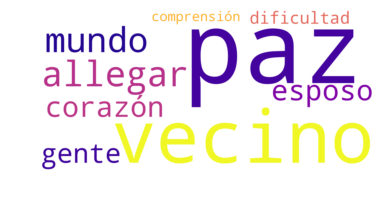

In [41]:
#print(listalemmas)
stopwords = get_stop_words('es')
pidgeon_mask = np.array(Image.open("./pidgeon.png"))
string=' '.join(str(r) for v in listalemmas for r in v)
string=string.replace(' tener ', '')
string=string.replace(' paces ', '')
string=string.replace(' haber ', '')
string=string.replace(' porque ', '')
string=string.replace(' pues ', '')
string=string.replace(' ser ', '')
string=string.replace(' si ', '')
string=string.replace(' entonces ', '')
string=string.replace(' hacer ', '')
string=string.replace(' ma ', '')
string=string.replace(' seriar ', '')
string=string.replace(' mismo ', '')
string=string.replace(' haer ', '')
string=string.replace(' demás ', '')
string=string.replace(' dema ', '')
string=string.replace(' hio ', 'hijo')
string=string.replace(' esrte ', '')
string=string.replace(' tangahumano ', '')
string=string.replace(' risa ', '')
#string=verbos.lemma.str.cat(sep=' ')
#print(string)
#w= WordCloud(background_color="white", max_words=2000,collocations=False,mask=pidgeon_mask,scale=2).generate(string.lower())
#w= WordCloud(background_color="white", max_words=20000,collocations=False,scale=4,colormap='Wistia',stopwords=stopwords).generate(string.lower())
w= WordCloud(background_color="white", max_words=200,collocations=False,scale=6,colormap='plasma',stopwords=stopwords).generate(string.lower())
# lower max_font_size
#wordcloud = WordCloud(max_font_size=40).generate(string)
plt.figure()
plt.imshow(w, interpolation="bilinear")
plt.axis("off")
#plt.savefig('./tolerantep2.png', dpi=1000)
plt.show()


# PRUEBAS FALLIDAS

In [118]:
#oraciones con tener
#print((filtrotoken['sentences']))
#print((filtrotoken['tokens']))
sentenceslist=filtrotoken['sentences'].tolist()
#print((type(sentenceslist[1])) )
listofDBsSentences=[]
for i in range(len(sentenceslist)):
    #print(i)
    db=pd.DataFrame(sentenceslist[i])
    listofDBsSentences.append(db)
    
sentenceslist=[]
for i in range(len(listofDBsSentences)):
    #if i!=4688:
        #print(i)
        #verbosDB= listofDB[i][listofDB[i]['partOfSpeech'].apply(str).str.contains('NOUN')]
        DB= listofDBsSentences[i]['text']
        sentenceslist.append(DB)
    
#verboslemmatizados=[]
#for i in range(len(listOfverbosDB)):
    #verboslemmatizados.append(listOfverbosDB[i]['lemma'])
    #print((listOfverbosDB[i]['lemma']))
    #todoslosverbos=[]
#for i in range(len(verboslemmatizados)):
    #print(i)
 #   x=verboslemmatizados[i].tolist()
  #  todoslosverbos.append(x)


In [120]:
print(sentenceslist)


[0    {'content': 'Pues, sería con más, estuvieran m...
Name: text, dtype: object, 0    {'content': 'Sería un pueblo muy feliz porque ...
Name: text, dtype: object, 0    {'content': 'Lo que le conteste hace rato de s...
Name: text, dtype: object, 0    {'content': 'Pues, sería una tierra más chéver...
Name: text, dtype: object, 0    {'content': 'Sería algo es espectacular y mara...
Name: text, dtype: object, 0    {'content': 'Acá tenemos el nombre de remanso ...
Name: text, dtype: object, 0    {'content': 'Sería muy lindo, muy hermoso, sí,...
1    {'content': 'Pero para eso habría que tener mu...
2    {'content': 'Que se acabara el desempleo, que ...
3    {'content': 'Primero  se muere el paciente que...
Name: text, dtype: object, 0    {'content': 'Que le mejorar el precio de los p...
1    {'content': 'Y si trabaja porque la gente tien...
2    {'content': 'Pero la razón es esa, que no hay ...
3    {'content': 'Entonces allá aparece que vino el...
4    {'content': 'Pero la realidad es qu

In [69]:
#tener qué
for i in range(len(listofDB)):
    #if i!=4688:
        #print(i)
        #verbosDB= listofDB[i][listofDB[i]['partOfSpeech'].apply(str).str.contains('NOUN')]
        DB= listofDB[i][listofDB[i]['lemma'].apply(str).str.contains('tener')]
#print(len(listofDB))
#listofDB[4689].info()
#print(listofDB[50]['dependencyEdge'])


In [71]:
print(listOfDBs[100]['text'])

12     {'content': 'tuvimos', 'beginOffset': 53}
73      {'content': 'tengo', 'beginOffset': 336}
187     {'content': 'tengo', 'beginOffset': 812}
257     {'content': 'tuve', 'beginOffset': 1104}
Name: text, dtype: object


In [280]:
i=0
#posdb1 = pd.DataFrame(columns=['tag','aspect','case','form','gender','mood','number','person','proper','reciprocity','tense','voice'])
posdb1 = pd.DataFrame(columns=['0','1','2','3','4','5','6','7','8','9','10','11'])

for index, row in tokensdb.iterrows():
    #print(i)
    i=i+1
    print(i)
    posi=row['partOfSpeech']
    #print(type(posi.items()))
    #print(type(posi))
    #data = pd.DataFrame.from_dict(list(posi.items())).T
    data=list(posi.items())
    print(type(data[0]))
    print(data)
    #print(data.info())
    posdb1=posdb1.append(data, ignore_index=True)
    #print(posdb1.info())
    #print('daTAAAAA',i,data)
    #print('FILAAAA',i,type(row['partOfSpeech']))

1
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

/home/laufernanda/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
47
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
48
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNK

91
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
92
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
93
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'

135
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
136
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
137
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_

177
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
178
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACTIVE')]
179
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_U

215
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
216
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
217
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), 

248
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
249
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACTIVE')]
250
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_U

[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
278
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'PREPOSITIONAL'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
279
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOW

309
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
310
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
311
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'COND

337
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
338
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
339
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNO

[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
365
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
366
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOW

393
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
394
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
395
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOW

420
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
421
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
422
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN

445
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
446
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
447
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPR

470
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
471
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
472
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_

494
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
495
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
496
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'),

518
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
519
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
520
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOW

542
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
543
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
544
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE

586
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
587
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
588
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('ten

629
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
630
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
631
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 

671
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACTIVE')]
672
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
673
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UN

710
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
711
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
712
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECI

<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
748
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'PERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACTIVE')]
749
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice'

786
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
787
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
788
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
821
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
822
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'V

854
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
855
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
856
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKN

886
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
887
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
888
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
917
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
918
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('vo

[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
949
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
950
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'),

980
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
981
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
982
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
983
<class 'tup

<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1012
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1013
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN')

[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
1042
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1043
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1044
<class

[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1071
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
1072
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'),

1098
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1099
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
1100
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'T

1125
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1126
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1127
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIP

<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1153
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1154
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN

1178
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
1179
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1180
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

1204
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1205
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1206
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'REC

1230
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1231
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
1232
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENS

1254
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1255
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1256
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

1288
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1289
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1290
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TE

1320
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1321
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1322
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

1353
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1354
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1355
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('ten

1386
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1387
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
1388
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', '

[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1416
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1417
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN

1447
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1448
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1449
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense',

1480
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1481
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1482
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'R

1513
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1514
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1515
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1544
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
1545
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('v

1575
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1576
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'PREPOSITIONAL'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1577
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'R

1603
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1604
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1605
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), 

1634
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1635
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1636
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'NOMINATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNK

1664
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1665
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
1666
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TEN

1693
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1694
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
1695
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

1722
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1723
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
1724
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN')

1752
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1753
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1754
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TEN

1781
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1782
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
1783
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'T

1807
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'ACCUSATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1808
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
1809
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice

1834
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
1835
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'NOMINATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1836
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'

1861
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1862
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
1863
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN')

1888
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1889
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1890
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tens

1915
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1916
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1917
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE

1942
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1943
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1944
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

1968
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1969
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1970
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

1994
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1995
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
1996
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

2020
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2021
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2022
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense',

2044
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2045
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'PERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
2046
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

2069
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2070
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2071
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

2093
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2094
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
2095
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'

2124
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2125
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2126
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

2148
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2149
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2150
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

2180
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2181
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2182
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_

2204
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2205
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2206
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

2228
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2229
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACTIVE')]
2230
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOIC

2252
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2253
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
2254
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN')

2276
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2277
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2278
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RE

2305
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
2306
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2307
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TEN

2357
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
2358
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2359
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_

2385
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
2386
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2387
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 

2413
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2414
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2415
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE

2441
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2442
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2443
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), (

2469
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2470
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'PERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACTIVE')]
2471
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), 

2497
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2498
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2499
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

2524
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2525
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2526
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

2552
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2553
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2554
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKN

2580
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2581
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'PREPOSITIONAL'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2582
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCI

2608
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2609
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2610
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCI

2636
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2637
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2638
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense'

2664
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2665
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2666
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2690
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2691
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE

2715
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2716
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2717
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'REC

[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
2743
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2744
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
2745
<class

[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2771
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2772
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNO

2795
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2796
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2797
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

2819
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2820
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2821
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

2843
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2844
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2845
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

2868
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2869
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2870
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

2892
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2893
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2894
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

2916
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2917
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2918
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN

2940
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2941
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2942
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'REC

2964
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2965
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'ACCUSATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2966
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'

2988
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2989
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
2990
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

3012
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3013
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3014
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

3041
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3042
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3043
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

3065
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3066
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3067
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

3089
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3090
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3091
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

3116
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
3117
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3118
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN

3166
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3167
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3168
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

3193
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3194
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3195
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('

3217
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3218
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3219
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3246
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3247
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 

<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
3270
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'ACCUSATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3271
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense'

[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3294
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3295
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'PREPOSITIONAL'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice'

3320
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3321
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3322
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

3347
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3348
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3349
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('ten

3372
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3373
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3374
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNO

3398
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3399
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3400
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

3423
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3424
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3425
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

3448
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3449
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3450
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKN

3473
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3474
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3475
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_

3498
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3499
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3500
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tens

3523
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3524
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3525
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense',

3548
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3549
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3550
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense'

3575
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3576
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3577
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

3600
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3601
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3602
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

3625
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3626
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3627
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

3650
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3651
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3652
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

3678
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3679
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3680
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'

3702
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3703
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3704
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'REC

3727
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3728
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3729
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKN

3752
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
3753
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3754
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice'

3777
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3778
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3779
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense',

3802
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
3803
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3804
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOW

3827
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3828
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3829
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

3852
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
3853
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3854
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

3877
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3878
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3879
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

3901
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3902
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3903
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

3926
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3927
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3928
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN')

3951
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3952
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3953
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense',

<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
3976
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
3977
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tens

4001
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4002
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4003
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

4025
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4026
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4027
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

4049
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4050
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
4051
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENS

[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4077
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
4078
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', '

4100
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4101
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4102
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

4127
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4128
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4129
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

4151
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4152
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4153
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), 

4177
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4178
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4179
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'R

4203
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4204
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4205
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

4230
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4231
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4232
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', '

4254
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4255
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4256
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

4280
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4281
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4282
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNO

4305
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4306
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
4307
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TEN

4329
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4330
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4331
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_

4353
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4354
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'PERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
4355
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

4377
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4378
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4379
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL

4401
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER_UNKNOWN'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4402
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4403
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCI

4425
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4426
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4427
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECI

4449
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4450
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4451
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('

4473
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4474
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
4475
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', '

4497
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4498
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4499
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

4521
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4522
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4523
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

4545
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4546
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4547
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTI

4569
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4570
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'NOMINATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4571
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN')

4593
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4594
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4595
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

4617
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4618
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4619
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('ten

4641
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4642
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4643
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

4665
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'PERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACTIVE')]
4666
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
4667
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOI

4689
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4690
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4691
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

4713
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4714
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4715
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

4737
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4738
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4739
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECI

4761
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4762
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
4763
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNO

4785
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
4786
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4787
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice'

4811
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4812
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4813
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

4835
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4836
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4837
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN

4859
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4860
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4861
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

4886
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4887
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4888
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

4910
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4911
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4912
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

4934
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4935
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4936
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

4958
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4959
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4960
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

4982
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4983
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
4984
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

5006
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5007
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5008
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('

5030
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5031
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5032
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

5054
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5055
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'PASSIVE')]
5056
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice'

5078
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5079
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5080
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

5102
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5103
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5104
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'R

5129
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5130
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5131
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNO

5153
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
5154
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5155
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TE

5177
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5178
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5179
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_

5201
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5202
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5203
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'

5225
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5226
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
5227
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'

5249
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5250
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5251
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKN

5273
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5274
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5275
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

5297
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5298
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
5299
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tens

5321
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5322
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5323
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'

5345
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5346
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5347
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', '

5372
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5373
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5374
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

5397
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
5398
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5399
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TE

5421
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5422
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5423
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice',

5447
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5448
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5449
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

5473
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5474
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5475
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense',

5500
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5501
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5502
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKN

<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5525
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5526
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN

5550
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
5551
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5552
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_

5574
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5575
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5576
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('ten

5598
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5599
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5600
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

5624
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5625
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5626
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

5648
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
5649
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5650
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

5672
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5673
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER_UNKNOWN'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5674
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

5696
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5697
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5698
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

5721
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
5722
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5723
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', '

5745
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5746
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5747
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER'), ('reciprocity', 'RECIPROCITY_UN

5769
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
5770
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5771
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_

5793
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5794
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5795
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'PREPOSITIONAL'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKN

5817
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5818
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5819
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

5841
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5842
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5843
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense',

5865
<class 'tuple'>
[('tag', 'X'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER_UNKNOWN'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5866
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5867
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER_UNKNOWN'), ('reciprocity', 'RECIPR

5889
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5890
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5891
<class 'tuple'>
[('tag', 'X'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER_UNKNOWN'), ('reciprocity', 'RECIPROCITY_UNKNOW

5913
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5914
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5915
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 

5937
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5938
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5939
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

5961
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5962
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5963
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT

5985
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5986
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
5987
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

6009
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6010
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6011
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

6033
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6034
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6035
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

6057
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6058
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6059
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

6081
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6082
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6083
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

6105
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6106
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6107
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'REC

6129
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6130
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6131
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_

6153
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6154
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6155
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

6177
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
6178
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6179
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

6201
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6202
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
6203
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'T

6225
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
6226
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6227
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNO

6249
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6250
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6251
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

6273
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6274
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6275
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

6297
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6298
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6299
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('ten

6321
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6322
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6323
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

6345
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6346
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6347
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKN

6369
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6370
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
6371
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense'

6393
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6394
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6395
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACT

6417
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6418
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6419
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

6443
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6444
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6445
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

6467
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6468
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6469
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

6491
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6492
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6493
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

6515
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
6516
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6517
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_U

6539
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6540
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6541
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

6563
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6564
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6565
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

6587
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6588
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6589
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITI

6611
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6612
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6613
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TE

6635
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6636
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
6637
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

6662
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
6663
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6664
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN

6686
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6687
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
6688
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

6710
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6711
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
6712
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense',

6734
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'NOMINATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6735
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
6736
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), (

6758
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6759
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6760
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 

6782
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6783
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6784
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'),

6806
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6807
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6808
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TE

6830
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6831
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6832
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOW

6854
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6855
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6856
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

6878
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6879
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
6880
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

6902
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6903
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6904
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

6927
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6928
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6929
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECI

6953
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6954
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6955
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

6978
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
6979
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
6980
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TE

7002
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7003
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7004
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN

7026
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
7027
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7028
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 

7052
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7053
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7054
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'REC

7076
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7077
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7078
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense'

7100
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7101
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7102
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

7124
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7125
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7126
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', '

7148
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7149
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7150
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKN

7172
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7173
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7174
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('ten

7196
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7197
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7198
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

7220
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7221
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7222
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

7244
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7245
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7246
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

7270
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7271
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7272
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECI

7294
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7295
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7296
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('ten

7318
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
7319
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7320
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', '

7342
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7343
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7344
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

7366
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7367
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7368
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN

7390
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7391
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7392
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

7414
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7415
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7416
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE

7438
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7439
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7440
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

7462
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
7463
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7464
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

7486
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7487
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
7488
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), (

7511
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7512
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7513
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', '

7537
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7538
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACTIVE')]
7539
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENS

7561
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7562
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7563
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

7585
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7586
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACTIVE')]
7587
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'),

7611
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7612
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7613
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('ten

7637
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7638
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7639
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 

7684
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
7685
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7686
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UN

7711
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7712
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7713
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'NOMINATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UN

7736
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7737
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
7738
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN

7762
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7763
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7764
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

7788
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'PERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
7789
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7790
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

7814
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7815
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
7816
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKN

7838
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7839
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7840
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNO

7862
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7863
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7864
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('ten

7886
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7887
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'IMPERATIVE'), ('number', 'SINGULAR'), ('person', 'SECOND'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
7888
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TE

7910
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7911
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'IMPERATIVE'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
7912
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'),

7935
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7936
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7937
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense',

7959
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7960
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7961
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'),

7983
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7984
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
7985
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKN

8007
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8008
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8009
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TEN

8032
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8033
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8034
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

8056
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8057
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8058
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIP

8080
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8081
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8082
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('ten

8104
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8105
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8106
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOW

8128
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8129
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8130
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tens

8152
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8153
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8154
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tens

8176
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8177
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8178
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UN

8202
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8203
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8204
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONA

8227
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8228
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8229
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

8251
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8252
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8253
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense'

<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8277
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8278
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense'

8301
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8302
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8303
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('

8327
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8328
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8329
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

8352
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'NOMINATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8353
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8354
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE'

8378
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
8379
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8380
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_U

8403
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8404
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8405
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

8428
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
8429
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8430
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TE

8452
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8453
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8454
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8478
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8479
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE

8502
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8503
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
8504
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN')

8526
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8527
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8528
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense',

8551
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8552
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8553
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'P

8575
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8576
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
8577
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TE

<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8600
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8601
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('vo

8625
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
8626
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8627
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice',

8650
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
8651
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8652
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN')

8674
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8675
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8676
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNK

8698
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8699
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8700
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('

8722
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8723
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8724
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('

8746
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8747
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'ACTIVE')]
8748
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('t

8770
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
8771
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8772
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), 

8794
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8795
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'CONDITIONAL_TENSE'), ('voice', 'VOICE_UNKNOWN')]
8796
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', '

8818
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8819
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8820
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKN

8842
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8843
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8844
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

8867
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8868
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8869
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECI

[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'ACTIVE')]
8893
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8894
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE

8916
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8917
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8918
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), 

8940
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8941
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACTIVE')]
8942
<class 'tuple'>
[('tag', 'ADP'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), (

8964
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER_UNKNOWN'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8965
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8966
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'P

8988
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8989
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
8990
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_

9012
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9013
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
9014
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN')

9036
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9037
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9038
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense

9060
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9061
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PAST'), ('voice', 'ACTIVE')]
9062
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN

9084
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9085
<class 'tuple'>
[('tag', 'ADV'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9086
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'),

9108
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'INDICATIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
9109
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9110
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('v

9132
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'SINGULAR'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'), ('voice', 'ACTIVE')]
9133
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9134
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voi

9156
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9157
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9158
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENS

9180
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9181
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'MASCULINE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'PLURAL'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9182
<class 'tuple'>
[('tag', 'VERB'), ('aspect', 'IMPERFECTIVE'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'SUBJUNCTIVE'), ('number', 'PLURAL'), ('person', 'THIRD'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'PRESENT'),

9204
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9205
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9206
<class 'tuple'>
[('tag', 'ADJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_

9228
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9229
<class 'tuple'>
[('tag', 'PUNCT'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9230
<class 'tuple'>
[('tag', 'PRON'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'DATIVE'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'FIRST'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', '

9252
<class 'tuple'>
[('tag', 'DET'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9253
<class 'tuple'>
[('tag', 'NOUN'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'FEMININE'), ('mood', 'MOOD_UNKNOWN'), ('number', 'SINGULAR'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('tense', 'TENSE_UNKNOWN'), ('voice', 'VOICE_UNKNOWN')]
9254
<class 'tuple'>
[('tag', 'CONJ'), ('aspect', 'ASPECT_UNKNOWN'), ('case', 'CASE_UNKNOWN'), ('form', 'FORM_UNKNOWN'), ('gender', 'GENDER_UNKNOWN'), ('mood', 'MOOD_UNKNOWN'), ('number', 'NUMBER_UNKNOWN'), ('person', 'PERSON_UNKNOWN'), ('proper', 'NOT_PROPER'), ('reciprocity', 'RECIPROCITY_UNKNOWN'), ('te

KeyboardInterrupt: 

In [270]:
len(tokensdb.iterrows())
#posdb1.head()

TypeError: object of type 'generator' has no len()

In [138]:
poslist=tokensdb['partOfSpeech'].tolist()
print(type(poslist[0]))
posdb= pd.DataFrame(poslist)
posdb.info()
posdb.head()
#print(type(p1jsons[0]))

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587442 entries, 0 to 587441
Data columns (total 12 columns):
aspect         587442 non-null object
case           587442 non-null object
form           587442 non-null object
gender         587442 non-null object
mood           587442 non-null object
number         587442 non-null object
person         587442 non-null object
proper         587442 non-null object
reciprocity    587442 non-null object
tag            587442 non-null object
tense          587442 non-null object
voice          587442 non-null object
dtypes: object(12)
memory usage: 53.8+ MB


aspect          case          form          gender          mood  \
0  ASPECT_UNKNOWN  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
1  ASPECT_UNKNOWN  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
2    IMPERFECTIVE  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
3  ASPECT_UNKNOWN  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
4  ASPECT_UNKNOWN  CASE_UNKNOWN  FORM_UNKNOWN        FEMININE  MOOD_UNKNOWN   

           number          person      proper          reciprocity    tag  \
0  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN    ADP   
1  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN  PUNCT   
2  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN   VERB   
3  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN    ADP   
4        SINGULAR  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN   NOUN   

           tense          voice  
0  TENSE_UNKNOWN  VOICE_UNKNOWN  
1  TENSE_UNKNOWN  VOICE_UNKNOWN  
2  TENSE_UNKNOWN         ACTIVE  
3  TENSE_UNKNOWN  VOICE_UNKNOWN  
4  TENSE_UNKNOWN  VOICE_UNKNOWN

In [139]:
#lemma= tokensdb[tokensdb.columns[1]]
#print(lemma[0:5])
#lemma.info()
#print(type(lemma))
pdb= posdb.join([tokensdb])
#posdb['ĺemma']=pd.Series(lemma, index=posdb.index)
del pdb['dependencyEdge']
del pdb['partOfSpeech']
del pdb['text']
pdb.head()
#pdb.info()


aspect          case          form          gender          mood  \
0  ASPECT_UNKNOWN  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
0  ASPECT_UNKNOWN  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
0  ASPECT_UNKNOWN  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
0  ASPECT_UNKNOWN  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
0  ASPECT_UNKNOWN  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   

           number          person      proper          reciprocity  tag  \
0  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN  ADP   
0  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN  ADP   
0  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN  ADP   
0  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN  ADP   
0  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN  ADP   

           tense          voice lemma  \
0  TENSE_UNKNOWN  VOICE_UNKNOWN  Pues   
0  TENSE_UNKNOWN  VOICE_UNKNOWN  Como   
0  TENSE_UNKNOWN  VOICE_UNKNOWN  Pues   
0  TENSE_UNKNOWN  VOICE_UNKNOWN   Ser   
0  TENSE_UNKNOWN  VOICE_UNKNOWN  Hmmm   

                                         ĺemma  
0  {'headTokenIndex': 2, 'label': 'DISCOURSE'}  
0       {'headTokenIndex': 0, 'label': 'ROOT'}  
0  {'headTokenIndex': 2, 'label': 'DISCOURSE'}  
0       {'headTokenIndex': 0, 'label': 'ROOT'}  
0      {'headTokenIndex': 2, 'label': 'NSUBJ'}

In [140]:
del pdb['ĺemma']

In [182]:
pdb.head()
pdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1174154 entries, 0 to 587441
Data columns (total 13 columns):
aspect         1174154 non-null object
case           1174154 non-null object
form           1174154 non-null object
gender         1174154 non-null object
mood           1174154 non-null object
number         1174154 non-null object
person         1174154 non-null object
proper         1174154 non-null object
reciprocity    1174154 non-null object
tag            1174154 non-null object
tense          1174154 non-null object
voice          1174154 non-null object
lemma          587442 non-null object
dtypes: object(13)
memory usage: 125.4+ MB


In [144]:
verbos=pdb[pdb['tag'].str.contains('VERB')]
verbos.head()

aspect          case          form          gender          mood  \
2  IMPERFECTIVE  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
2  IMPERFECTIVE  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
2  IMPERFECTIVE  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
2  IMPERFECTIVE  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   
2  IMPERFECTIVE  CASE_UNKNOWN  FORM_UNKNOWN  GENDER_UNKNOWN  MOOD_UNKNOWN   

           number          person      proper          reciprocity   tag  \
2  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN  VERB   
2  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN  VERB   
2  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN  VERB   
2  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN  VERB   
2  NUMBER_UNKNOWN  PERSON_UNKNOWN  NOT_PROPER  RECIPROCITY_UNKNOWN  VERB   

           tense   voice      lemma  
2  TENSE_UNKNOWN  ACTIVE      vivir  
2  TENSE_UNKNOWN  ACTIVE  tranquilo  
2  TENSE_UNKNOWN  ACTIVE      vivir  
2  TENSE_UNKNOWN  ACTIVE     pueblo  
2  TENSE_UNKNOWN  ACTIVE        ser

In [181]:
verbos.info()
tablaverbos=pd.crosstab(index=verbos['lemma'],columns='count')
print(tablaverbos)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158404 entries, 2 to 587437
Data columns (total 13 columns):
aspect         158404 non-null object
case           158404 non-null object
form           158404 non-null object
gender         158404 non-null object
mood           158404 non-null object
number         158404 non-null object
person         158404 non-null object
proper         158404 non-null object
reciprocity    158404 non-null object
tag            158404 non-null object
tense          158404 non-null object
voice          158404 non-null object
lemma          65599 non-null object
dtypes: object(13)
memory usage: 21.9+ MB
col_0        count
lemma             
!               75
"               15
$1.500.          3
'               16
(              185
)              407
,             5058
, ,              4
,,               4
.             2072
..              13
...             32
0                3
13               3
4                3
:               10
;           

In [16]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words

stopwords = get_stop_words('es')
print(stopwords)

['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuesen', 'fueses', 'fu

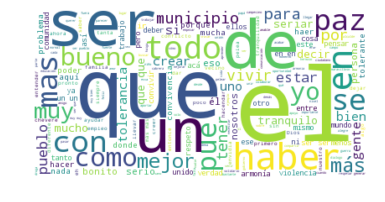

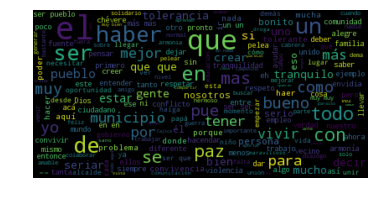

In [175]:
wc = WordCloud(background_color="white", max_words=2000)
string=verbos.lemma.str.cat(sep=' ')
#print(string)
wc.generate(string)
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(string)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()